# Analyze r/loseit Challenge Data

Now we can read in the already cleaned file. If you don't have the cleaned data, you will need to run [Find and Clean Loseit Data](clean_loseit_challenge_data.ipynb).

In [1]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import datetime as dt
import re
import matplotlib.pyplot as plt
import seaborn as sns
import os
color = sns.color_palette()

%matplotlib inline

In [2]:
big_df = pd.read_csv('./data/cleaned_and_combined_loseit_challenge_data.csv', index_col=0)

In [3]:
big_df.count()

Timestamp                    7859
Username                     7859
Team                         7859
Age                          7859
Gender                       7859
Height                       7859
Highest Weight               7859
Starting Weight              7859
Challenge Goal Weight        7859
Starting BMI                 7859
Has NSV                      7859
Has Food Tracker             7859
Has Activity Tracker         7859
Final Weight                 7859
Total Challenge Loss         7859
Challenge Percentage Lost    7859
Percent of Challenge Goal    7859
dtype: int64

In [4]:
big_df['Percent of Challenge Goal'].mean()

68.62461376317984

In [5]:
print(len(big_df[big_df.Gender == 'Female']) / len(big_df) * 100, len(big_df[big_df.Gender == 'Male']) / len(big_df) * 100, len(big_df[big_df.Gender == 'Unknown']) / len(big_df) * 100, len(big_df[big_df.Gender == 'Other']) / len(big_df) * 100)

67.43860542053697 19.328158798829367 12.367985748823006 0.865250031810663


In [6]:
big_df.Height.mean()

66.48906419391786

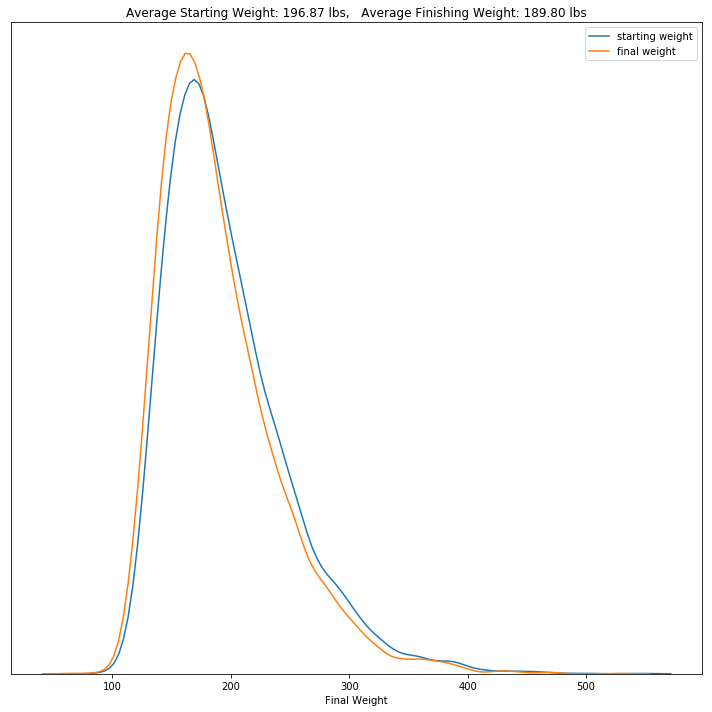

In [7]:
plt.figure(figsize=(10,10))
ax = sns.distplot(big_df['Starting Weight'], hist=False, label='starting weight')
ax = sns.distplot(big_df['Final Weight'], hist=False, label='final weight')
ax.set_yticks([])
ax.set_title(f'Average Starting Weight: {big_df["Starting Weight"].mean():.2f} lbs,   Average Finishing Weight: {big_df["Final Weight"].mean():.2f} lbs')
ax.legend()
plt.tight_layout()
plt.savefig('./figures/starting_final_weight.png', dpi=400)

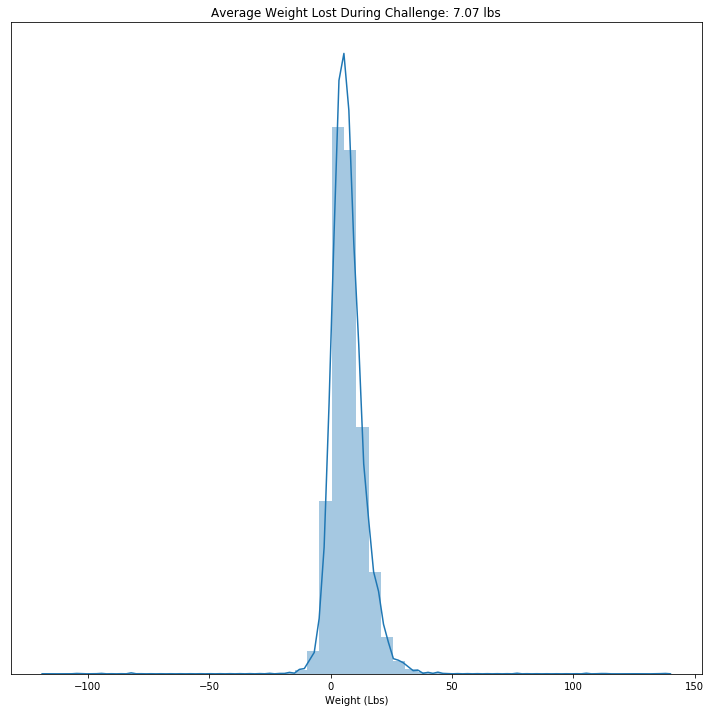

In [8]:
plt.figure(figsize=(10,10))
ax = sns.distplot(big_df['Total Challenge Loss'])
ax.set_xlabel('Weight (Lbs)')
ax.set_title(f'Average Weight Lost During Challenge: {big_df["Total Challenge Loss"].mean():.2f} lbs')
ax.set_yticks([])
plt.tight_layout()
plt.savefig('./figures/average_weight_lost.png', dpi=400)

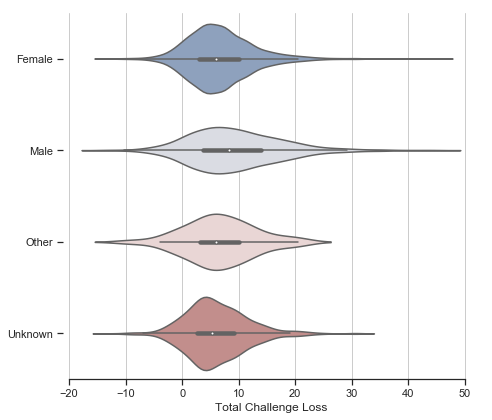

In [60]:
# remove some of the outliers for incorrect data entry
no_out_df = big_df[50 >  np.abs(big_df['Total Challenge Loss'])]
no_out_df = no_out_df[no_out_df['Total Challenge Loss'] > -15] # people are probably not gaining more than 15 lbs during the challenges 

sns.set(style="ticks")
f, ax = plt.subplots(figsize=(7, 6))

sns.violinplot(x="Total Challenge Loss", y="Gender", data=no_out_df,
            palette="vlag")

# sns.boxplot(x="Total Challenge Loss", y="Gender", data=no_out_df,
#             whis="range", palette="vlag")

# sns.swarmplot(x="Total Challenge Loss", y="Gender", data=no_out_df,
#               size=2, color=".3", linewidth=0)

ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)
f.tight_layout()
f.savefig('./figures/violin_gender_weight_lost.png', dpi=400)

In [58]:
no_out_df['Total Challenge Loss'].mean()

7.100141312938175

In [79]:
no_out_df.Age.sort_values().head(20)

4560     1.0
2134    13.0
3092    14.0
8600    14.0
6714    14.0
2826    14.0
1332    14.0
6144    15.0
4547    15.0
8144    15.0
7204    15.0
8210    15.0
2841    16.0
7343    16.0
6055    16.0
6066    16.0
4127    16.0
6595    16.0
2414    16.0
907     16.0
Name: Age, dtype: float64

In [89]:
no_out_df[no_out_df.Age < 16].sort_values(by='Age')

,Timestamp,Username,Team,Age,Gender,Height,Highest Weight,Starting Weight,Challenge Goal Weight,Starting BMI,Has NSV,Has Food Tracker,Has Activity Tracker,Final Weight,Total Challenge Loss,Challenge Percentage Lost,Percent of Challenge Goal
4560,7/15/2016 13:18:30,Spartan117g,SUNSHINE,1.0,Male,31.0,165.0,181.0,171.0,132.41,0,0,0,178.0,3.0,1.657459,30.000000
2134,6/2/2017 9:56:52,FattyTeen12,Deadpool,13.0,Unknown,58.0,125.0,90.3,90.0,19.43,1,1,1,88.0,2.3,2.547065,766.666667
1332,3/23/2018 19:40:15,thehealthymt,Dragon,14.0,Female,66.0,252.0,232.0,229.0,37.44,1,1,0,229.9,2.1,0.905172,70.000000
2826,6/11/2017 13:28:15,Elessar_Inman,Batman,14.0,Unknown,69.0,143.0,137.5,130.0,20.72,1,0,0,137.0,0.5,0.363636,6.666667
3092,6/29/2018 10:11:35,thehealthymt,Radagast,14.0,Female,66.5,249.0,218.0,210.0,34.66,1,1,0,206.7,11.3,5.183486,141.250000
6714,8/25/2017 23:16:25,thehealthymt,Terminator,14.0,Female,67.0,249.9,238.0,228.0,37.30,1,0,0,230.0,8.0,3.361345,80.000000
8600,1/8/2017 14:26:41,cantthinkofanything3,Snake,14.0,Male,65.0,215.0,207.5,200.0,34.53,1,0,0,200.4,7.1,3.421687,94.666667
4547,7/1/2016 19:56:06,Quietrabbit,SUNSHINE,15.0,Female,72.0,206.0,183.6,173.6,24.90,1,1,0,167.0,16.6,9.041394,166.000000
6144,11/8/2017 21:20:34,achemare,Tiger,15.0,Male,64.0,178.0,178.0,165.0,30.55,0,1,1,170.0,8.0,4.494382,61.538462
7204,1/16/2018 15:52:50,achemare,Leopard Gecko,15.0,Male,65.0,182.0,183.0,160.0,30.45,1,0,0,173.6,9.4,5.136612,40.869565


In [83]:
no_out_df.Age.sort_values(ascending=False).head(20)

1967    100.0
3890    100.0
3535     76.0
2074     76.0
6955     75.0
3841     73.0
1615     72.0
6570     72.0
7261     72.0
4489     71.0
7799     71.0
1455     69.0
5610     69.0
7611     69.0
8023     68.0
8123     68.0
2254     68.0
6032     68.0
6482     68.0
924      67.0
Name: Age, dtype: float64

In [88]:
no_out_df[no_out_df.Age > 65].sort_values(by='Age', ascending=False)

,Timestamp,Username,Team,Age,Gender,Height,Highest Weight,Starting Weight,Challenge Goal Weight,Starting BMI,Has NSV,Has Food Tracker,Has Activity Tracker,Final Weight,Total Challenge Loss,Challenge Percentage Lost,Percent of Challenge Goal
1967,4/4/2018 13:13:16,AmIaThrowawayTotally,Yeti,100.0,Other,67.0,299.0,299.0,290.0,46.82,0,0,0,290.0,9.0,3.010033,100.000000
3890,7/11/2018 11:42:20,AmIaThrowAwayTotally,Shadowfax,100.0,Other,67.0,200.0,200.0,190.0,31.32,1,0,0,196.5,3.5,1.750000,35.000000
2074,4/12/2018 12:33:46,patchet44,Cerberus,76.0,Female,68.0,208.0,163.0,157.0,24.78,1,0,0,159.9,3.1,1.901840,51.666667
3535,7/1/2018 18:29:57,mcculloughronnie75,Shadowfax,76.0,Female,61.0,175.0,166.0,155.0,31.36,1,0,1,162.0,4.0,2.409639,36.363636
6955,1/6/2018 18:33:51,mcculloughronnie75,Hamster,75.0,Female,61.0,175.0,171.0,159.0,32.31,1,0,0,168.0,3.0,1.754386,25.000000
3841,7/9/2018 20:18:48,vivimos,Ents,73.0,Male,73.0,255.0,199.0,189.0,26.25,1,0,1,195.8,3.2,1.608040,32.000000
6570,8/19/2017 15:52:14,vivimos,Terminator,72.0,Male,73.0,250.0,193.9,182.0,25.60,1,1,1,190.6,3.3,1.701908,27.731092
1615,3/26/2018 13:13:41,vivimos,Cerberus,72.0,Male,73.0,255.0,207.4,197.0,27.36,1,1,1,200.2,7.2,3.471553,69.230769
7261,1/5/2018 20:04:13,vivimos,Owl,72.0,Male,73.0,255.0,213.5,199.0,28.16,1,1,1,202.8,10.7,5.011710,73.793103
4489,7/7/2016 21:17:17,vivimos,SUNFLOWER,71.0,Male,73.0,255.0,218.5,190.0,28.82,1,1,1,197.3,21.2,9.702517,74.385965


In [ ]:
big_df.sort_values()

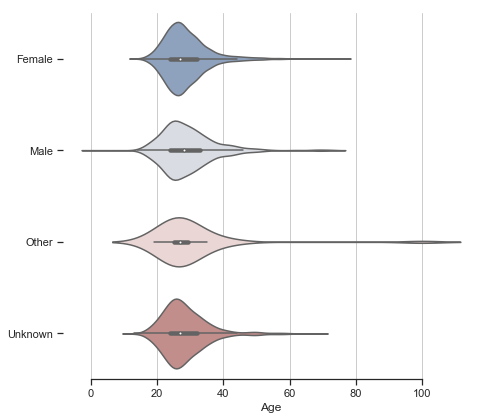

In [61]:
sns.set(style="ticks")
f, ax = plt.subplots(figsize=(7, 6))

sns.violinplot(x='Age', y="Gender", data=no_out_df,
            palette="vlag")

ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)
f.tight_layout()
f.savefig('./figures/violin_gender_age.png', dpi=400)